<a href="https://colab.research.google.com/github/amirmohammadkalateh/Learning_Rate/blob/main/Learning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [17]:
np.random.seed(42)
X = np.random.rand(1000, 1) * 10
y = 2 * X + 1 + np.random.randn(1000, 1) * 2

In [20]:
def build_model(learning_rate):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(1,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

In [21]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
histories = {}

In [22]:
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = build_model(lr)
    history = model.fit(X, y, epochs=100, verbose=0) # reduced verbosity during training.
    histories[lr] = history.history['loss']
    print(f"Final loss for learning rate {lr}: {histories[lr][-1]}")



Training with learning rate: 0.0001
Final loss for learning rate 0.0001: 3.9191572666168213

Training with learning rate: 0.001
Final loss for learning rate 0.001: 3.913750171661377

Training with learning rate: 0.01
Final loss for learning rate 0.01: 3.9739603996276855

Training with learning rate: 0.1
Final loss for learning rate 0.1: 4.2335100173950195


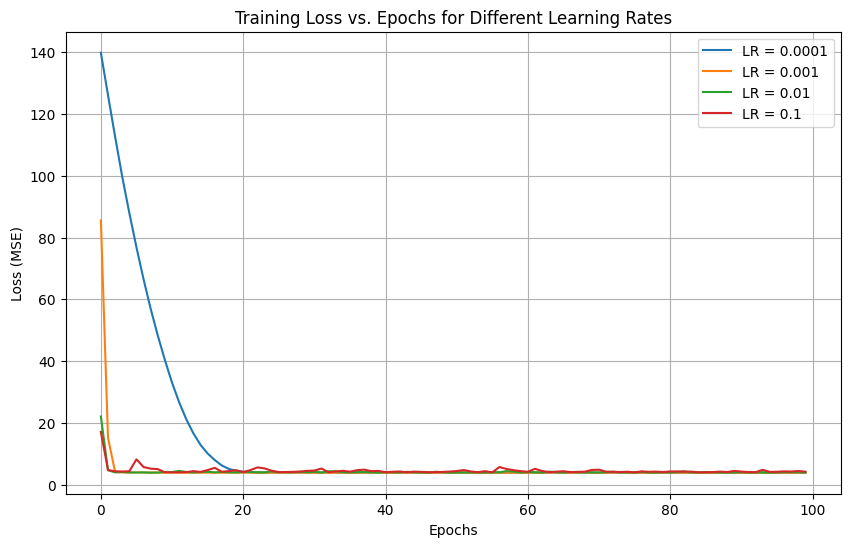

In [23]:
plt.figure(figsize=(10, 6))
for lr, loss in histories.items():
    plt.plot(loss, label=f'LR = {lr}')

plt.title('Training Loss vs. Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
best_lr = 0.001
best_model = build_model(best_lr)
best_model.fit(X,y, epochs=100, verbose = 0)
print(best_model.predict(np.array([[5.0]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[11.341132]]
